In [1]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.metrics import classification_report


df = pd.read_csv("alexa.csv")


def preprocess_text(text):
    if pd.isnull(text):  
        return ""  
    text = text.lower()
    return text

df['clean_review'] = df['Review'].apply(preprocess_text)


tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['clean_review'])
X = tokenizer.texts_to_sequences(df['clean_review'])
X = pad_sequences(X, maxlen=100)  

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Liked'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)

y_pred_prob = model.predict(X_test)

# Convert probabilities to classes based on a threshold (0.5 in this case)
y_pred = (y_pred_prob > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, y_pred))

# Save the model if needed
model.save("customer_satisfaction_model.h5")


Epoch 1/5


C:\Users\nids6\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.8639 - loss: 0.4453 - val_accuracy: 0.9079 - val_loss: 0.3053
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9298 - loss: 0.2474 - val_accuracy: 0.9079 - val_loss: 0.2884
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.9242 - loss: 0.2251 - val_accuracy: 0.9159 - val_loss: 0.2419
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.9441 - loss: 0.1705 - val_accuracy: 0.9190 - val_loss: 0.2103
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.9536 - loss: 0.1092 - val_accuracy: 0.9222 - val_loss: 0.2023
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


              precision    recall  f1-score   support

           0       0.63      0.38      0.47        58
           1       0.94      0.98      0.96       572

    accuracy                           0.92       630
   macro avg       0.78      0.68      0.72       630
weighted avg       0.91      0.92      0.91       630



In [3]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9222


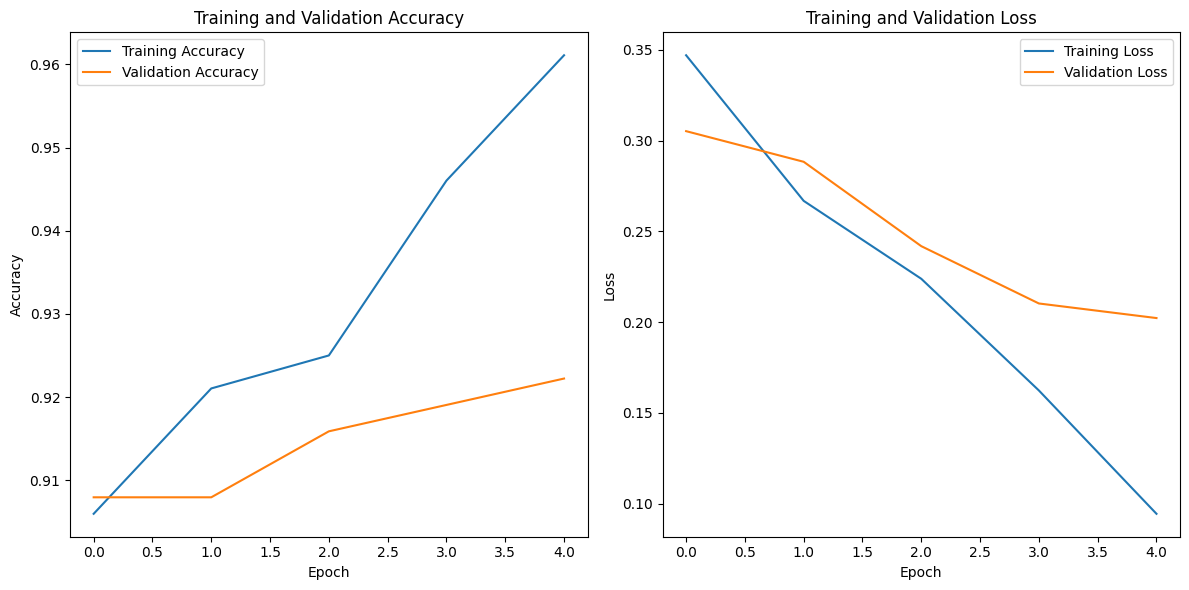

In [4]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


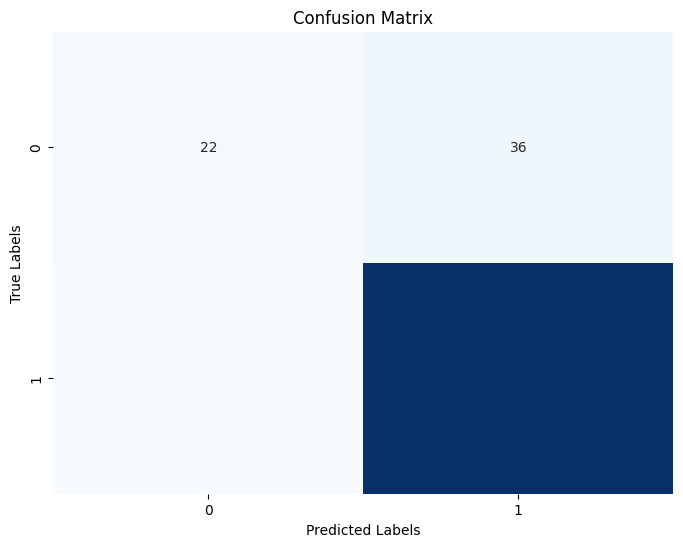

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
